In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from scipy.stats.stats import pearsonr
from scipy import stats


file = pd.read_csv("..//..//Data//CleanData_mileage_price_enginesize.csv")

file.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Aygo,2017,9250,Manual,4414,Other,150,68.9,1.0
1,Aygo,2017,7100,Manual,32351,Petrol,0,68.9,1.0
2,Aygo,2016,6500,Manual,26193,Petrol,0,69.0,1.0
3,Aygo,2017,7650,Manual,12134,Petrol,0,68.9,1.0
4,Aygo,2016,6999,Manual,21123,Petrol,0,69.0,1.0


In [2]:
X_constant = sm.add_constant(file.mpg)
lin_reg = sm.OLS(file.price,X_constant).fit()
lin_reg.summary()

C:\Users\samslomowitz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     1405.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):          2.15e-293
Time:                        19:11:59   Log-Likelihood:            -1.3540e+05
No. Observations:               14233   AIC:                         2.708e+05
Df Residuals:                   14231   BIC:                         2.708e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.812e+04    188.271     96.254      0.000    1.78e+04    1.85e+04
mpg         -113.5489      3.029    -37.487      0.000    -119.486    -107.612
==============================================================================
Omnibus:                     1103.072   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1379.418
Skew:                           0.728   Prob(JB):                    2.91e-300
Kurtosis:                       3.453   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\SAMSLO~1\AppData\Local\Temp/ipykernel_6276/3187121986.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color = "#2A6BAC")


The r-squared is: 0.08987485998936913


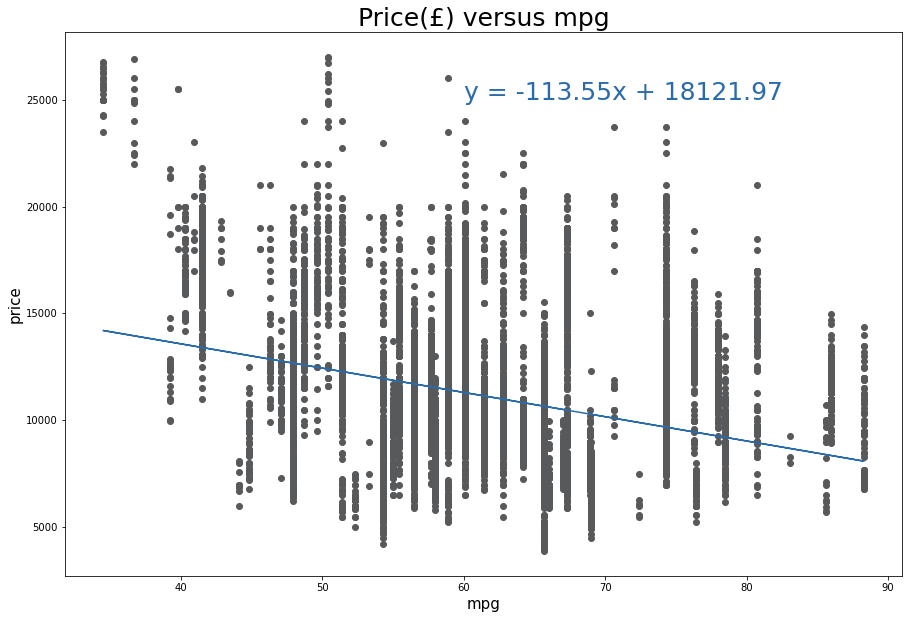

In [3]:
plt.figure(figsize=(15,10))
x_values = file['mpg']
y_values = file['price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color ="#58595B")
plt.plot(x_values,regress_values,"r-", color = "#2A6BAC")
plt.annotate(line_eq,(60,25000),fontsize=25,color="#2A6BAC")
plt.title("Price(£) versus mpg", fontsize = 25)
plt.xlabel('mpg', fontsize = 15)
plt.ylabel('price', fontsize = 15)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("out.png") 
plt.show()

In [4]:
X_constant = sm.add_constant(file.engineSize)
lin_reg = sm.OLS(file.price,X_constant).fit()
lin_reg.summary()

C:\Users\samslomowitz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     1875.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:12:00   Log-Likelihood:            -1.3519e+05
No. Observations:               14233   AIC:                         2.704e+05
Df Residuals:                   14231   BIC:                         2.704e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6245.0081    116.221     53.734      0.000    6017.199    6472.817
engineSize  4081.7719     94.260     43.303      0.000    3897.010    4266.534
==============================================================================
Omnibus:                      987.923   Durbin-Watson:                   1.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1203.130
Skew:                           0.701   Prob(JB):                    5.54e-262
Kurtosis:                       3.255   Cond. No.                         8.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\SAMSLO~1\AppData\Local\Temp/ipykernel_6276/1628150637.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color = "#2A6BAC")


The r-squared is: 0.11642599234251726


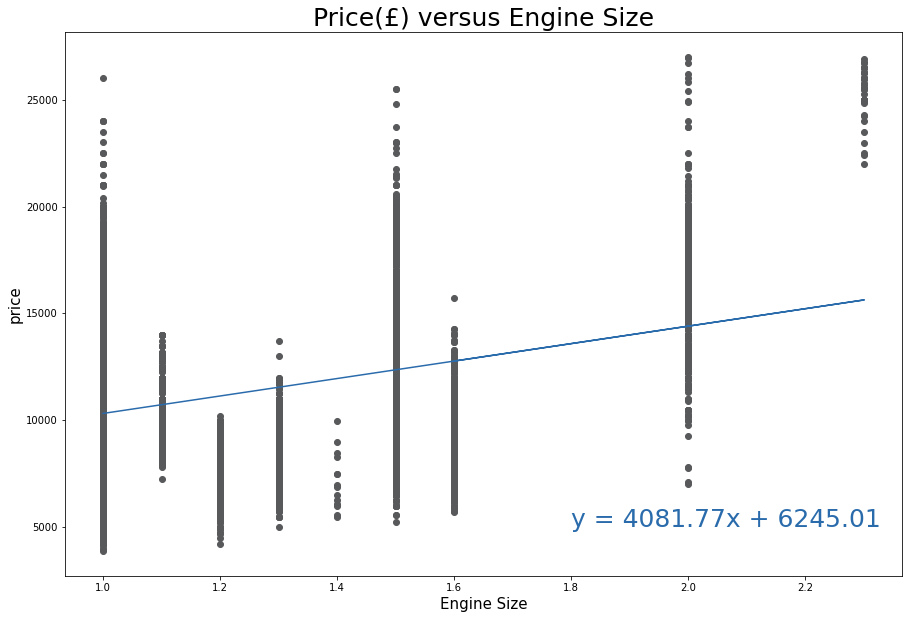

In [5]:
plt.figure(figsize=(15,10))
x_values = file['engineSize']
y_values = file['price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color ="#58595B")
plt.plot(x_values,regress_values,"r-", color = "#2A6BAC")
plt.annotate(line_eq,(1.8,5000),fontsize=25,color="#2A6BAC")
plt.title("Price(£) versus Engine Size", fontsize = 25)
plt.xlabel('Engine Size', fontsize = 15)
plt.ylabel('price', fontsize = 15)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("out2.png") 
plt.show()


In [6]:
X_constant = sm.add_constant(file.mileage)
lin_reg = sm.OLS(file.price,X_constant).fit()
lin_reg.summary()

C:\Users\samslomowitz\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     5201.
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:12:01   Log-Likelihood:            -1.3385e+05
No. Observations:               14233   AIC:                         2.677e+05
Df Residuals:                   14231   BIC:                         2.677e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.383e+04     44.678    309.506      0.000    1.37e+04    1.39e+04
mileage       -0.1429      0.002    -72.119      0.000      -0.147      -0.139
==============================================================================
Omnibus:                     1653.645   Durbin-Watson:                   0.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2522.679
Skew:                           0.850   Prob(JB):                         0.00
Kurtosis:                       4.167   Cond. No.                     4.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\SAMSLO~1\AppData\Local\Temp/ipykernel_6276/1438264992.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x_values,regress_values,"r-", color = "#2A6BAC")


The r-squared is: 0.2676592791580957


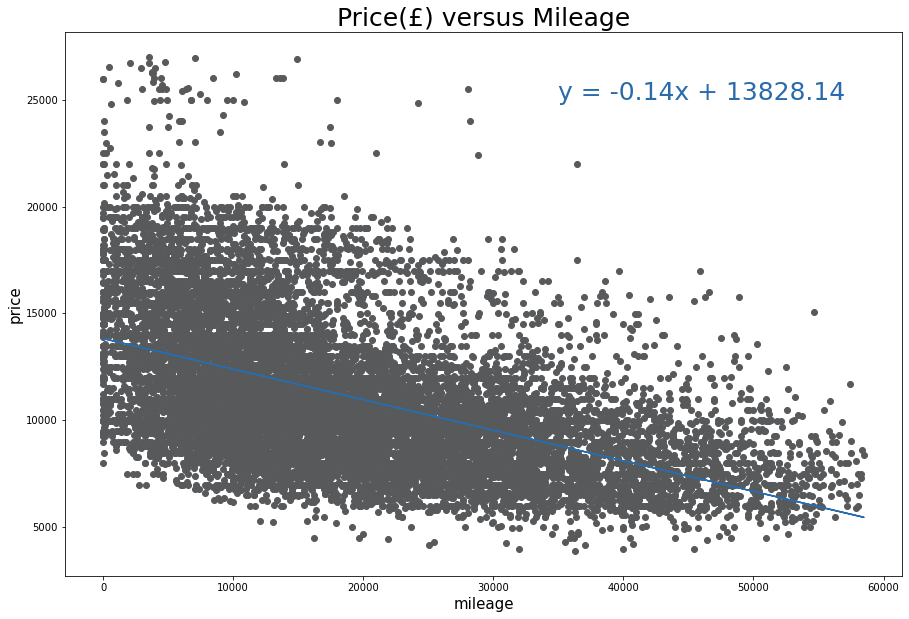

In [7]:
plt.figure(figsize=(15,10))
x_values = file['mileage']
y_values = file['price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color ="#58595B")
plt.plot(x_values,regress_values,"r-", color = "#2A6BAC")
plt.annotate(line_eq,(35000,25000),fontsize=25,color="#2A6BAC")
plt.title("Price(£) versus Mileage", fontsize = 25)
plt.xlabel('mileage', fontsize = 15)
plt.ylabel('price', fontsize = 15)
print(f"The r-squared is: {rvalue**2}")
plt.savefig("out9.png") 
plt.show()
